In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import (
    DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz)

%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data[:, 2:] # petal len, petal wid
y = iris.target

In [3]:
df = pd.DataFrame(data=X)
df['y'] = y
df.columns = ['petal_length', 'petal_width', 'species']
df.head()

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


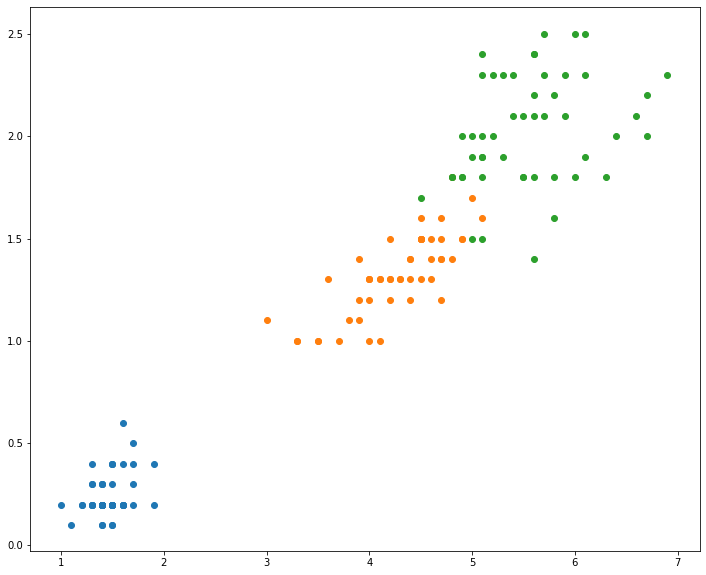

In [5]:
plt.figure(figsize=(12, 10))
for sp in set(y):
    sub = df.loc[df.species == sp]
    plt.scatter(sub.petal_length, sub.petal_width, label=sp);

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [6]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
export_graphviz(tree_clf, 
                out_file='iris_tree.dot', 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

In [8]:
!dot -Tpng iris_tree.dot -o iris_tree.png

<img src="iris_tree.png" />

### What is this Gini Metric?
"Gini Impurity" ...not to be confused with the Gini Coefficient
https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity

Entropy-based metrics (e.g., Information Gain) are also used, but Gini tends to be the most common.

In [9]:
def get_gini(props):
    props = np.array(props)
    assert props.sum() == 1
    return 1 - (props**2).sum()

In [10]:
get_gini([1, 0])

0

In [11]:
get_gini([0.75, 0.25])

0.375

In [12]:
get_gini([0.5, 0.5])

0.5

In [13]:
get_gini([0.9, 0.05, 0.05])

0.18500000000000005

In [14]:
get_gini([0.33, 0.34, 0.33])

0.6666

## Overfitting is Still an Issue!
How might we improve this...?

In [15]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
export_graphviz(tree_clf, 
                out_file='iris_tree_2tier.dot', 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

In [17]:
!dot -Tpng iris_tree_2tier.dot -o iris_tree_2tier.png

<img src="iris_tree_2tier.png" />

In [18]:
!ls ../churnTutorial/

churn_tutorial.py.ipynb merged_2019-07-26.csv


In [19]:
churn = pd.read_csv('../churnTutorial/merged_2019-07-26.csv')
churn.head()

,group_id,cost,subscription_days,total_users,active_users,total_minutes,courses,mobile_users,mobile_minutes,n_exams,...,t:admin_logged_in,t:autopay,bookmark_usage:n_bookmarks,any_courses:courses,any_minutes:total_minutes,any_mobile_minutes:mobile_minutes,contract:cost,contract:cost_per_total_user,cost_per_total_user:renewal_price,pay_type_wiretransfer
0,484909,999.00,566,1,1,1141,3,1,899,1,...,0,0,0,3,1141,899,0.0,0.0,998001.000000,0
1,547826,2693.10,365,3,4,3124,10,1,68,3,...,8,8,0,10,3124,68,0.0,0.0,896802.300000,0
2,484909,999.00,566,1,1,460,3,1,358,0,...,0,0,0,3,460,358,0.0,0.0,998001.000000,0
3,561390,12103.72,365,14,12,3905,37,2,38,2,...,0,0,0,37,3905,38,0.0,0.0,863686.877143,0
4,547826,2693.10,365,3,4,3384,14,1,68,3,...,9,9,0,14,3384,68,0.0,0.0,896802.300000,0


In [20]:
fields = list(churn)[1:13]
keep = fields + ['renewed']
churn = churn[keep]
churn.head()

,cost,subscription_days,total_users,active_users,total_minutes,courses,mobile_users,mobile_minutes,n_exams,exam_member,n_vlab,vlab_member,renewed
0,999.00,566,1,1,1141,3,1,899,1,1,0,0,0
1,2693.10,365,3,4,3124,10,1,68,3,3,0,0,0
2,999.00,566,1,1,460,3,1,358,0,0,0,0,0
3,12103.72,365,14,12,3905,37,2,38,2,2,3,3,0
4,2693.10,365,3,4,3384,14,1,68,3,3,2,1,0


In [21]:
X = churn[fields]
y = churn.renewed
X.shape, y.shape

((63231, 12), (63231,))

In [25]:
grid = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=1103),
    param_grid = [{'max_depth': [4, 8, 16],
                   'min_samples_split': [2, 4, 8],
                   'min_samples_leaf': [2, 4, 8]}],
    cv=10)

In [26]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1103,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [4, 8, 16],
                          'min_samples_leaf': [2, 4, 8],
                          '

In [27]:
print(grid.best_params_)

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [28]:
tree_clf = grid.best_estimator_
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1103, splitter='best')

In [29]:
fitted = tree_clf.predict(X)

In [30]:
len(tree_clf.feature_importances_), len(fields)

(12, 12)

In [31]:
feat_importance = pd.DataFrame({
    'predictor': fields, 'importance': tree_clf.feature_importances_})
feat_importance = feat_importance.sort_values('importance', 
                                              ascending=False)
feat_importance

,predictor,importance
0,cost,0.428502
1,subscription_days,0.232312
4,total_minutes,0.087483
11,vlab_member,0.073110
2,total_users,0.045539
5,courses,0.037336
7,mobile_minutes,0.036640
10,n_vlab,0.030146
8,n_exams,0.018060
3,active_users,0.010871
